In [29]:
import autograd.numpy as np
import os as os

%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [30]:
#results_dir = '18-09-06'
#results_dir = '18-10-24'
#results_dir = '18-11-01' # 1000 TR case
#results_dir = '18-11-15'
results_dir = '19-02-09'

#results_dir = '19-02-21'
#results_dir = '19-02-22'


plot_temp_dir = False

if(plot_temp_dir):
    FAs = np.loadtxt('tmp/temp_FAs.txt')
    TRs = np.loadtxt('tmp/temp_TRs.txt')
    fxs = np.loadtxt('tmp/temp_fx.txt')
    df_dFAs = np.loadtxt('tmp/temp_df_dFAs.txt')
    df_dTRs = np.loadtxt('tmp/temp_df_dTRs.txt')
    
    dm_dT1 = []
    dm_dT2 = []    
    if(os.path.exists('tmp/temp_dm_dT1.txt')):
        dm_dT1 = np.loadtxt('tmp/temp_dm_dT1.txt')
        dm_dT2 = np.loadtxt('tmp/temp_dm_dT2.txt')    
        
else:
    results_path = 'results/' + results_dir
    FAs = np.loadtxt(results_path + '/temp_FAs.txt')
    TRs = np.loadtxt(results_path + '/temp_TRs.txt')
    fxs = np.loadtxt(results_path + '/temp_fx.txt')
    df_dFAs = np.loadtxt(results_path + '/temp_df_dFAs.txt')
    df_dTRs = np.loadtxt(results_path + '/temp_df_dTRs.txt')
    
    dm_dT1 = []
    dm_dT2 = []    
    if(os.path.exists( results_path + '/temp_dm_dT1.txt')):
        dm_dT1 = np.loadtxt(results_path + '/temp_dm_dT1.txt')
        dm_dT2 = np.loadtxt(results_path + '/temp_dm_dT2.txt')
        
    
    
print(FAs.shape)

N = FAs.shape[-1]

def plot_a_data(data_in, title_str, show_zero_line=False):
    fig, ax = plt.subplots()

    x = np.arange(0, N)
    line, = ax.plot(x, data_in[0, :])
    
    if(show_zero_line):
        ax.plot(x, np.zeros(x.shape), '--', color='black')

    def init_data():
        line.set_ydata([np.nan] * N)
        return line,

    def animate_data(ii):
        line.set_ydata(data_in[ii, :])
        ax.set_title(title_str + ' Iteration ' + str(ii))
        return line,

    return fig, init_data, animate_data


(378, 400)


<IPython.core.display.Javascript object>


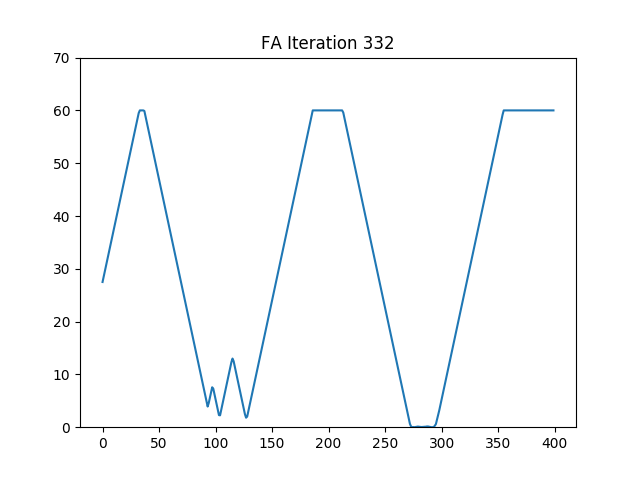

In [15]:
fig, init_data, animate_data = plot_a_data(FAs, 'FA')
ani = animation.FuncAnimation(
        fig, animate_data, init_func=init_data, interval=100, blit=True, save_count=FAs.shape[0], repeat= False)
plt.ylim([0, 70])
plt.show()

In [ ]:
ani.save('results/figures/CRLB_FA_opt.gif', writer='imagemagick', fps=15)

In [ ]:
fig, init_data, animate_data = plot_a_data(TRs, 'TR')
ani = animation.FuncAnimation(
        fig, animate_data, init_func=init_data, interval=100, blit=True, save_count=FAs.shape[0], repeat= False)

plt.ylim([10, 17])
plt.show()

In [ ]:
ani.save('results/figures/CRLB_TR_opt.gif', writer='imagemagick', fps=15)

In [ ]:
FAs_question = FAs[-1, :]
plt.figure()
plt.plot(np.abs(FAs_question[1::] - FAs_question[0:N-1]))
plt.title('FA constraint')
plt.show()

In [ ]:
TRs_question = TRs[-1, :]
plt.figure()
plt.plot(np.abs(TRs_question[1::] - TRs_question[0:N-1]))
plt.title('TR constraint')
plt.show()

In [ ]:
fig, init_data, animate_data = plot_a_data(df_dFAs, 'df_dFAs')
ani = animation.FuncAnimation(
        fig, animate_data, init_func=init_data, interval=100, blit=True, save_count=50, repeat= False)
plt.show()

In [ ]:
fig, init_data, animate_data = plot_a_data(df_dTRs, 'df_dTRs')
ani = animation.FuncAnimation(
        fig, animate_data, init_func=init_data, interval=100, blit=True, save_count=50, repeat= False)
plt.show()

In [ ]:
fx_fixed = np.copy(fxs)[1::]
#fx_fixed[32::] = fx_fixed[32::]/10.


relative_drop = fx_fixed[1::]/ fx_fixed[0:(fx_fixed.size-1)]

plt.figure()
plt.subplot(211)
plt.plot(fx_fixed)
plt.subplot(212)
plt.plot(np.log10(relative_drop))
plt.show()

print('start crlb ' + str(fx_fixed[0]))
print('end crlb ' + str(fx_fixed[-1]))
print('reduction ' + str((fx_fixed[0] - fx_fixed[-1])/fx_fixed[0]))
print('sqrt ratio ' + str(np.sqrt(fx_fixed[-1]/fx_fixed[0])))

## Plot dm_dT1, dm_dT2

<IPython.core.display.Javascript object>


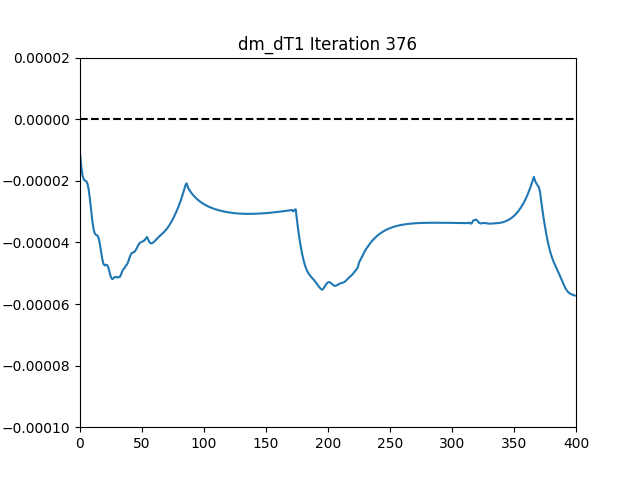

In [31]:
if dm_dT1.any():
    fig, init_data, animate_data = plot_a_data(dm_dT1, 'dm_dT1', show_zero_line=True)
    ani = animation.FuncAnimation( 
        fig, animate_data, init_func=init_data, interval=100, blit=True, save_count=FAs.shape[0], repeat= False)
    plt.ylim([-10e-5, 2e-5])
    plt.xlim([0, 400])
    plt.show()

In [ ]:
if dm_dT2.any():
    fig, init_data, animate_data = plot_a_data(dm_dT2, 'dm_dT2', show_zero_line=True)
    ani = animation.FuncAnimation(
        fig, animate_data, init_func=init_data, interval=100, blit=True, save_count=FAs.shape[0], repeat= False)
    plt.ylim([-20e-4, 20e-4])
    plt.show()

## Plot certain iterations

In [81]:
def plot_iterations(parameter, iters_to_plot, parameter_title, y_limits=None, parameter2=None, y_limits2=None, \
                   legend_str=None, show_zero_line=False):
    N = len(iters_to_plot)
    fig, _ = plt.subplots(figsize=[6.8, 6.8]) # make it a bit bigger to fit the ylabel on right side
    for ii, elem in enumerate(iters_to_plot):
        
        ax_left = plt.subplot(N, 1, ii + 1)
        
        line1,  = ax_left.plot(parameter[elem, :].T)
        plt.xlim([0, parameter.shape[1]])
        
        if(show_zero_line):            
            ax_left.plot(np.arange(0, parameter.shape[1]), np.zeros(parameter.shape[1]), '--', color='black', linewidth=0.8)

        plt.ylabel('Iter ' + str(elem))
        
        if(y_limits is not None):
            plt.ylim(y_limits)

        # first plot
        if(ii == 0):
            plt.title(parameter_title)
            
        # all except last plot
        if(ii < N - 1):
            plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
            
        # last plot
        if(ii == N-1):            
            plt.xlabel('Repetition Number')
            
        # do right side
        if(parameter2 is not None):
            #
            ax_right = ax_left.twinx()
            ax_right.plot(parameter2[elem, :].T, 'r--')
            ax_right.tick_params('y', colors='r')
            
            if(ii == N//2):
                #plt.ylabel('gradient')
                #plt.
                ax_right.set_ylabel('gradient', color='r')
                        
            # color left axis
            ax_left.tick_params('y', colors='b')
            
            if(y_limits2 is not None):
                plt.ylim(y_limits2)
                


    plt.show()
    
df_dTRs_grad_lims = [-.4, 1.5]
df_dFAs_grad_lims = [-2, .5]

if(plot_temp_dir):
    iters_to_plot = np.linspace(0, FAs.shape[0] - 2, 5, dtype=np.int16).tolist() # plots 5 iters
else:
    if(results_dir == '07-09-18'):
        iters_to_plot = [0, 10, 50, 100, 200, 250, 300]    
    elif(results_dir == '06-09-18'):
        iters_to_plot = [0, 10, 50, 100, 200]    
    elif(results_dir == '18-10-03'):
        iters_to_plot = [0, 10, 50, 100, 250]
    elif(results_dir == '18-10-08'):
        iters_to_plot = [0, 10, 50, 100, 350]
    elif(results_dir == '18-10-24'):
        iters_to_plot = [0, 10, 50, 100, 350]
    elif(results_dir == '18-11-01'):
        iters_to_plot = [0, 10, 50, 100, 200, 350]
        df_dTRs_grad_lims = [-.3, .3]
        df_dFAs_grad_lims = [-.3, .3]
    elif(results_dir == '18-11-15'):
        iters_to_plot = [0, 10, 50, 75, 100, 240]
        df_dTRs_grad_lims = [-.5, 1.5]
        df_dFAs_grad_lims = [-2, .5]        
    elif(results_dir == '19-02-09'):
        iters_to_plot = [0, 10, 50, 75, 100, 240]
        #iters_to_plot = [0, 50, 100, 250]
    else:
        iters_to_plot = np.linspace(0, FAs.shape[0] - 2, 5, dtype=np.int16).tolist() 
        

<IPython.core.display.Javascript object>


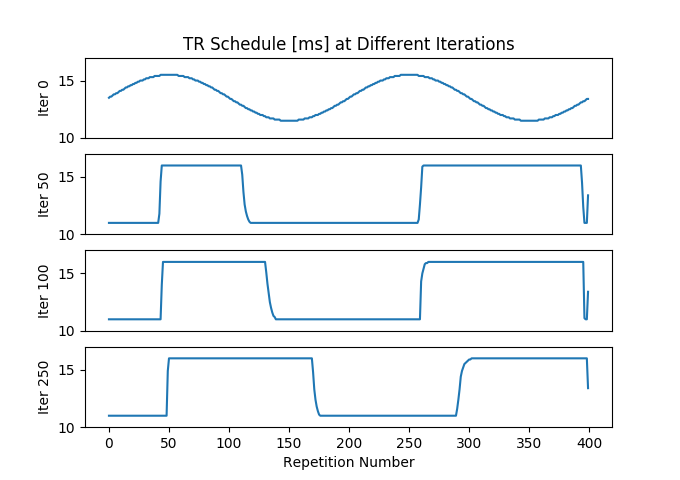

In [66]:
#plot_iterations(TRs, iters_to_plot, 'TR', '[ms]', [10, 17], df_dTRs, [-50, 200]) # 
plot_iterations(TRs, iters_to_plot, 'TR Schedule [ms] at Different Iterations', [10, 17]) # use for relative CRB


<IPython.core.display.Javascript object>


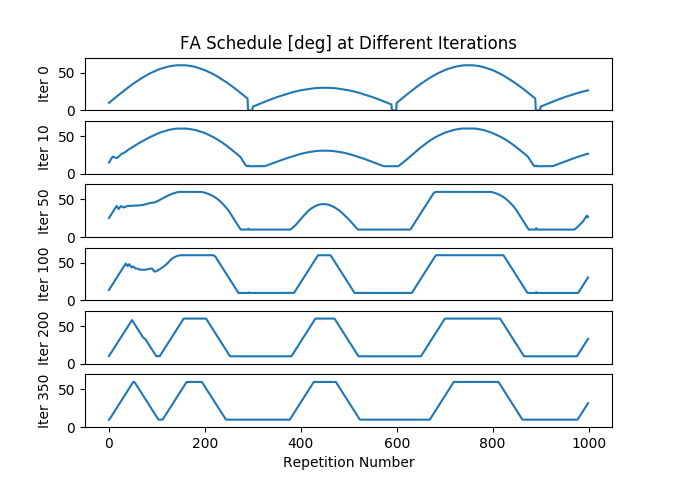

In [7]:
#plot_iterations(FAs, iters_to_plot, 'FA', '[degrees]', [0, 70], df_dFAs, [-150, 30])
plot_iterations(FAs, iters_to_plot, 'FA Schedule [deg] at Different Iterations', [0, 70])

<IPython.core.display.Javascript object>


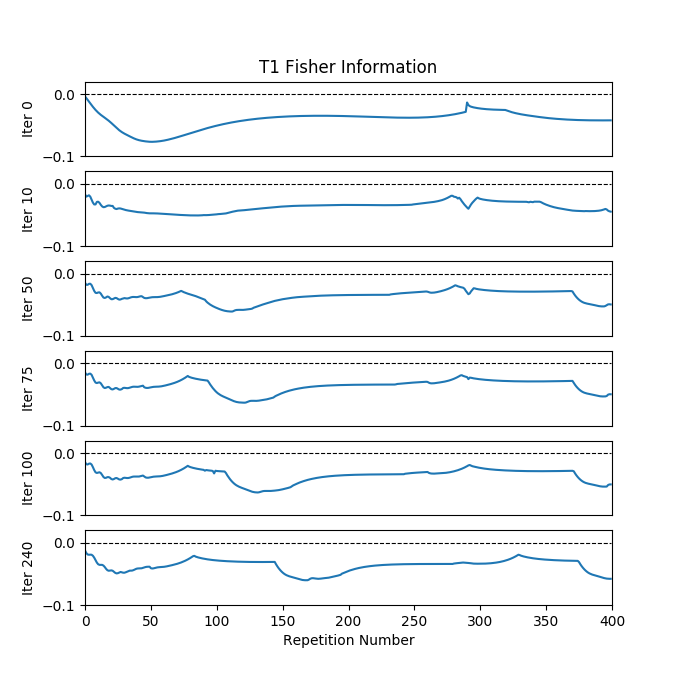

In [84]:
plot_iterations(dm_dT1 * 1e3, iters_to_plot, 'T1 Fisher Information', [-10e-2, 2e-2], show_zero_line=True)

<IPython.core.display.Javascript object>


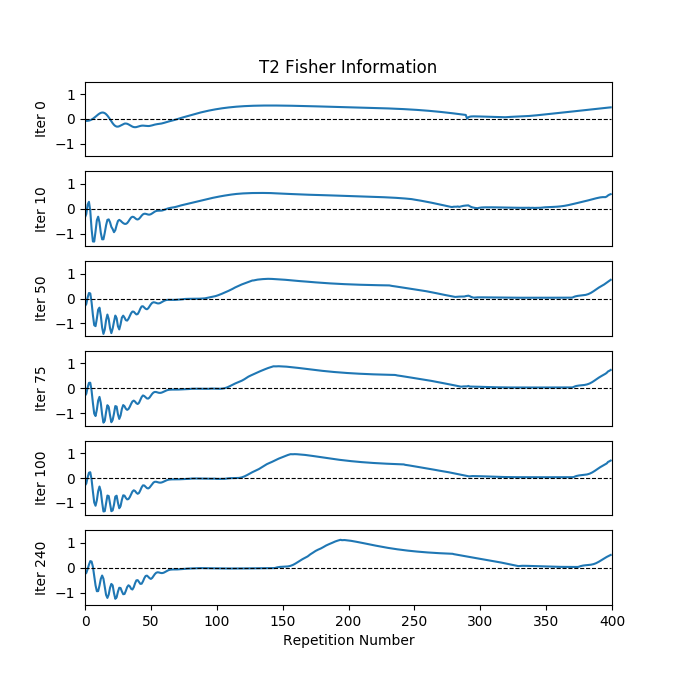

In [90]:
plot_iterations(dm_dT2 * 1e3, iters_to_plot, 'T2 Fisher Information', [-1.5, 1.5], show_zero_line=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


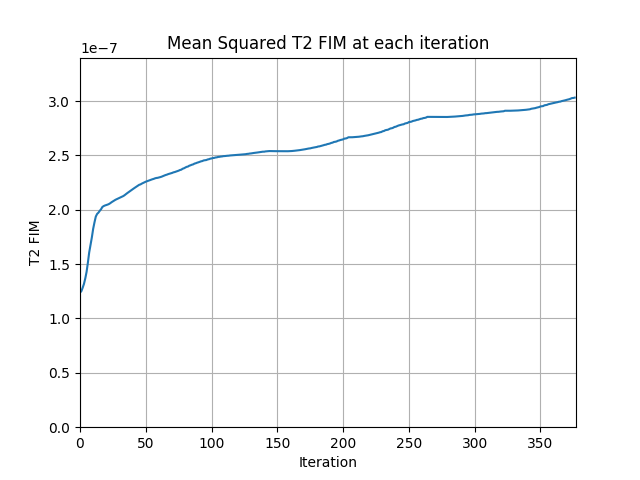

Text(0.5,0,'Iteration')

In [110]:
plt.figure()
plt.plot(np.mean(np.square(dm_dT1), axis=1))
plt.xlim([0, dm_dT1.shape[0]])
plt.title('Mean Squared T1 FIM at each iteration')
plt.xlabel('Iteration')
plt.ylabel('T1 FIM')
plt.grid()
plt.ylim([0, 2e-9])

plt.figure()
plt.plot(np.mean(np.square(dm_dT2), axis=1))
plt.xlim([0, dm_dT2.shape[0]])
plt.ylim([0, 3.4e-7])
plt.title('Mean Squared T2 FIM at each iteration')
plt.ylabel('T2 FIM')
plt.grid()
plt.xlabel('Iteration')